<a href="https://colab.research.google.com/github/rakshithakv/Rax221130/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml


In [3]:
mnist = fetch_openml('mnist_784')


In [6]:
x, y = mnist['data'], mnist['target']

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
%matplotlib inline

In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
some_digit = x[36002]
some_digit_image = some_digit.reshape(28,28)

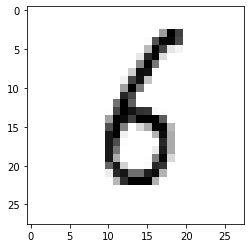

In [15]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation ='nearest')

In [16]:
y[36002]

'6'

In [17]:
x_train,x_test = x[:60000], x[60000:]

In [18]:
y_train,y_test = y[:60000], y[60000:]

In [19]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [36]:
##Creating a 2 detector
y_train = y_train.astype(np.int8)
y_test =  y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)


In [37]:
y_train

array([4, 8, 2, ..., 7, 1, 2], dtype=int8)

In [38]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression(tol =0.1)

In [43]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [44]:
clf.predict([some_digit])

array([False])

In [47]:
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [48]:
a.mean()

0.9786166666666668